# Classifying Fashion-MNIST

Now using the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist), a drop-in replacement for the MNIST dataset. MNIST is actually quite trivial with neural networks where you can easily achieve better than 97% accuracy. Fashion-MNIST is a set of 28x28 greyscale images of clothes. It's more complex than MNIST, so it's a better representation of the actual performance of your network, and a better representation of datasets you'll use in the real world.

<img src='assets/fashion-mnist-sprite.png' width=500px>

First off, let's load the dataset through torchvision.

In [6]:
import torch
from torchvision import datasets, transforms
import helper

# define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

Here we can see one of the images.

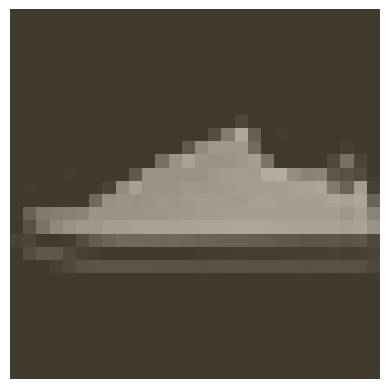

In [7]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

## Building the network

Here you should define your network. As with MNIST, each image is 28x28 which is a total of 784 pixels, and there are 10 classes. You should include at least one hidden layer. We suggest you use ReLU activations for the layers and to return the logits or log-softmax from the forward pass. It's up to you how many layers you add and the size of those layers.

In [9]:
from torch import nn, optim
# define network architecture
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64,10),
                      nn.LogSoftmax(dim=1))


# Train the network

Now you should create your network and train it. First you'll want to define [the criterion](http://pytorch.org/docs/master/nn.html#loss-functions) ( something like `nn.CrossEntropyLoss`) and [the optimizer](http://pytorch.org/docs/master/optim.html) (typically `optim.SGD` or `optim.Adam`).

Then write the training code. Remember the training pass is a fairly straightforward process:

* Make a forward pass through the network to get the logits 
* Use the logits to calculate the loss
* Perform a backward pass through the network with `loss.backward()` to calculate the gradients
* Take a step with the optimizer to update the weights

By adjusting the hyperparameters (hidden units, learning rate, etc), you should be able to get the training loss below 0.4.

In [12]:
# create the network, define the criterion and optimizer
# Define criterion
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(),lr = 0.001)


In [14]:
# train the network here
# determine number of epoch
epochs = 3
for e in range(epochs):
    current_loss = 0
    for images, labels in trainloader:
        # flat images từ 3D 3*28*28 thành 1D
        images = images.view(images.shape[0],-1)
        #feedforward model 
        output = model(images)
        # calculate loss
        loss = criterion(output, labels)
        #xoá DELETEEEEE NHỚ DÙM CÁI accum của gradient do torch cộng dồn
        optimizer.zero_grad()
        # xài autograd lấy gradient của loss
        loss.backward()
        # change weight dựa trên calculated gradient
        optimizer.step()
        current_loss += loss.item()
    else:
        print(f"Training loss:{current_loss/len(trainloader)}")

Training loss:1.0531853838388854
Training loss:0.981747912382012
Training loss:0.950259415230263


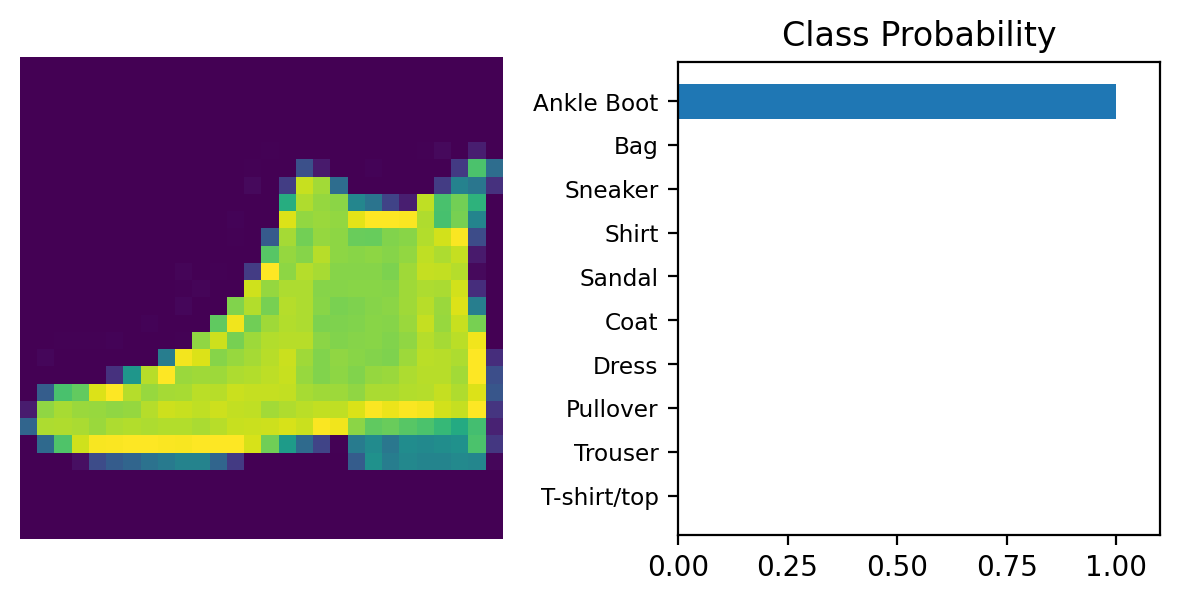

In [26]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper

dataiter = iter(testloader)
images, labels = next(dataiter)
img = images[0]
# convert 2d to 1d
img = img.resize_(1, 784)

# xclass probabilities (softmax) for img
ps = torch.exp(model(img))

# plot the image and prob
helper.view_classify(img.resize_(1, 28, 28), ps, version='Fashion')